## Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('Solarize_Light2')

# The other way
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split

#Sanity Check
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error, r2_score

In [2]:
#import os
#os.chdir('D:\DataScienceBC\Datensatz')

Feature Sets
- All Features
- 30 best correlated Features
- 30 least correlated Features

In [3]:
df = pd.read_parquet("Datensatz/df_dummy_all.pqt")

In [4]:
df.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('int32'), dtype('uint8')],
      dtype=object)

#### Train Test Split

In [5]:
X = df.drop('price', axis=1)
y = df.price

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14061, 101), (4688, 101), (14061,), (4688,))

##### Modeling with 30 worst Features with X 

In [7]:
lr_w = LinearRegression()

In [8]:
features_w =['condition_4', 'zipcode_98115', 'grade_4', 'zipcode_98122', 'zipcode_98125', 'zipcode_98019', 
            'zipcode_98027', 'zipcode_98045', 'zipcode_98028', 'zipcode_98116', 'zipcode_98029', 'long', 
            'zipcode_98166', 'zipcode_98010', 'zipcode_98059', 'zipcode_98103', 'zipcode_98144', 
            'zipcode_98007', 'zipcode_98117', 'zipcode_98014', 'zipcode_98011', 'zipcode_98107', 
            'zipcode_98070', 'zipcode_98072', 'condition_3', 
            'zipcode_98034', 'zipcode_98065', 'zipcode_98136', 'zipcode_98024', 'grade_8']


In [9]:
lr_w.fit(X_train[features_w], y_train)

LinearRegression()

In [10]:
# The Hyperparameters for Linear Regression
lr_w.fit(X_train[features_w], y_train).get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [11]:
y_pred_w = lr_w.predict(X_test[features_w])

In [12]:
median_absolute_error(y_test, y_pred_w)
mean_squared_error(y_test, y_pred_w, squared = False)
r2_score(y_test, y_pred_w)

0.015387829118094332

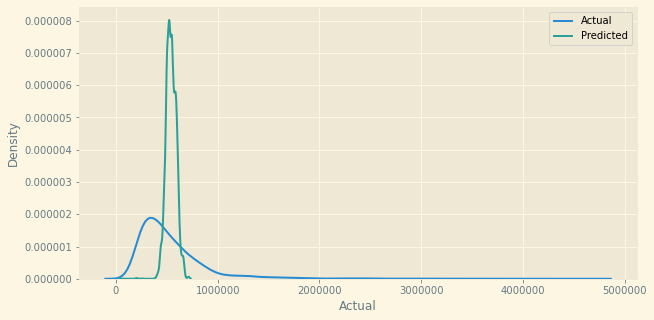

In [13]:
# Visualization of y vs y_pred

prices = pd.DataFrame({'Actual': y_test, 'Predicted': list(y_pred_w)})

plt.figure(figsize=(10,5))

sns.kdeplot(prices.Actual, label='Actual')
sns.kdeplot(prices.Predicted, label='Predicted')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend();

##### Modeling with all Features with X

In [14]:
lr_a = LinearRegression()

In [15]:
lr_a.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = lr_a.predict(X_test)

In [17]:
median_absolute_error(y_test, y_pred)
mean_squared_error(y_test, y_pred, squared = False)
r2_score(y_test, y_pred)

0.560516735805985

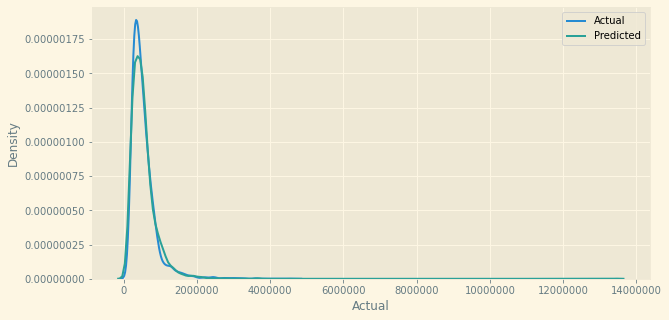

In [18]:
prices = pd.DataFrame({'Actual': y_test, 'Predicted': list(y_pred)})

plt.figure(figsize=(10,5))

sns.kdeplot(prices.Actual, label='Actual')
sns.kdeplot(prices.Predicted, label='Predicted')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend();

##### Modeling with 30 best Features with X 

In [19]:
lr_b = LinearRegression()

In [20]:
features_b = ['sqft_living', 'sqft_above', 'sqft_living15', 'bathrooms', 'grade_11', 'grade_10',
              'sqft_basement', 'grade_7', 'view_4', 'bedrooms', 'lat', 'grade_12', 
              'zipcode_98004', 'waterfront_1', 'floors', 'grade_9', 'grade_13',
              'zipcode_98039', 'grade_6', 'zipcode_98040', 'view_3', 'zipcode_98112', 'view_2',
              'zipcode_98006', 'yr_renovated',
              'zipcode_98023', 'zipcode_98042', 'zipcode_98033', 'view_1']

In [21]:
lr_b.fit(X_train[features_b], y_train)

LinearRegression()

In [22]:
y_pred_b = lr_b.predict(X_test[features_b])

In [23]:
median_absolute_error(y_test, y_pred_b)
print(mean_squared_error(y_test, y_pred_b, squared = False))
r2_score(y_test, y_pred_b)

173861.3422448566


0.7766918391497564

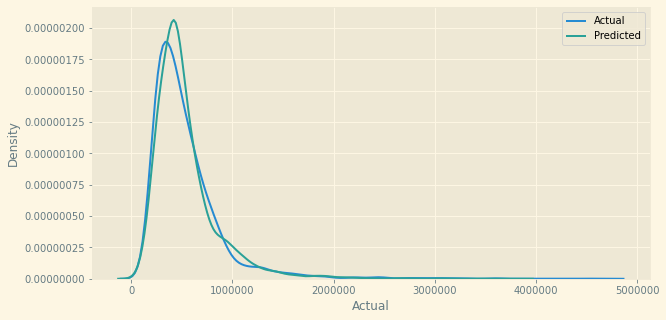

In [24]:
prices = pd.DataFrame({'Actual': y_test, 'Predicted': list(y_pred_b)})

plt.figure(figsize=(10,5))

sns.kdeplot(prices.Actual, label='Actual')
sns.kdeplot(prices.Predicted, label='Predicted')
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend();

#### Regression Coefficients for best Model

In [25]:
lr_b.intercept_, lr_b.coef_

(-28450267.508256566,
 array([ 9.66032053e+01,  4.71547452e+01, -7.72148668e+00,  1.96112756e+04,
         4.28758531e+05,  2.40386789e+05,  4.94484603e+01, -3.74468686e+04,
         2.87529791e+05, -1.30363687e+04,  6.02929721e+05,  9.20079221e+05,
         5.85782741e+05,  5.36513206e+05, -1.49961490e+04,  9.78834709e+04,
         2.18815407e+06,  1.01187891e+06, -5.39981319e+04,  3.40881456e+05,
         1.87394239e+05,  4.54270528e+05,  1.07135941e+05,  7.44803818e+04,
         4.02074357e+01, -4.23521694e+04, -2.54455737e+04,  1.22923064e+05,
         1.23963006e+05]))

In [26]:
coeff = pd.DataFrame({'Features': features_b, 'Coefficients': list(lr_b.coef_)})

In [27]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [28]:
coeff.sort_values('Coefficients', ascending=False)

,Features,Coefficients
16,grade_13,2188154.066
17,zipcode_98039,1011878.906
11,grade_12,920079.221
10,lat,602929.721
12,zipcode_98004,585782.741
13,waterfront_1,536513.206
21,zipcode_98112,454270.528
4,grade_11,428758.531
19,zipcode_98040,340881.456
8,view_4,287529.791


Saving the best model to disk with pickle<br>
Source:
https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/

In [29]:
import pickle

In [30]:
#filename = 'LinearRegressionHousing.sav'
#pickle.dump(lr_b, open(filename, 'wb'))

#### Findings
- Sum of Money made is same for all months over total time interval. This can't be right
- Good Features are key to a good prediction
- Intercept and coefficients are all over the place and not realistic. Maybe scaling the data could help. Or getting rid of Outliers in luxury segment? Best might be getting rid of multicollinearity between predictors like Areas

#### Decisions
- Excluded Date for Modeling, as array needs same data type and Date does not explain any variance (which it normally should)

#### Possible Improvements and new Features
- Find missing values of waterfront by geographical Data
- Find out if nan for renovation means same as 0 or data is really just missing
- Set a flag for houses of a certain age, which were not renovated
- Date sold could be an important indicator for the Price, as the houseing market is volatile: Add information about housing market, which certainly will improve prediction of price
- Infos found here could be included in model (https://kingcounty.gov/depts/executive/performance-strategy-budget/regional-planning/Demographics.aspx)
- Flag if _15 Values are better or worse than house
- Find "Good" Neighborhoods in Seattle: Distance to best areas or Flag for good/bad area.
- The luxury market may distort the prediction, so it could be wise to transform the data (log-transformation)
- Include Polynomial Features to see, if there are non linear relationships
- Include Level of Uncertainty